2025-01-05 00:37:57.973503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 30s 39ms/step - loss: 0.1922 - accuracy: 0.9422 - val_loss: 0.0671 - val_accuracy: 0.9794
Epoch 2/5
750/750 [==============================] - 29s 38ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0559 - val_accuracy: 0.9816
Epoch 3/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 4/5
750/750 [==============================] - 28s 37ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0369 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0353 - accuracy: 0.9884

Test Accuracy: 98.84%
313/313 [==============================] - 3s 9ms/step


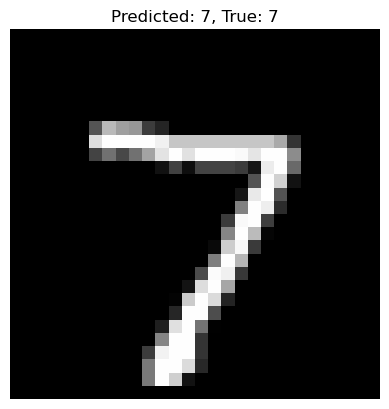

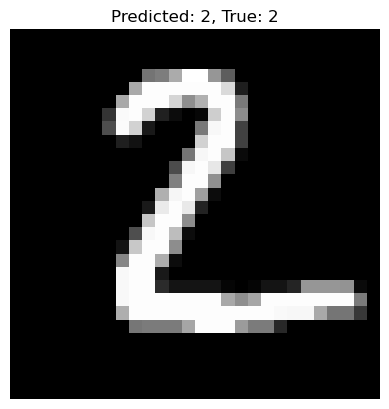

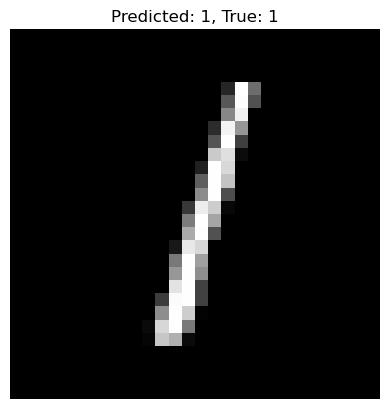

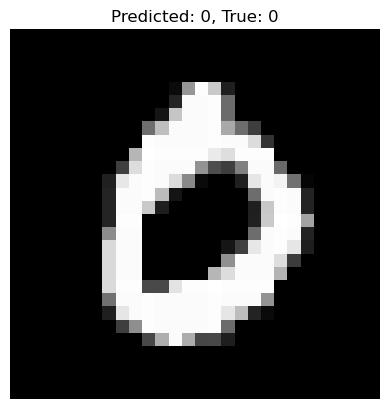

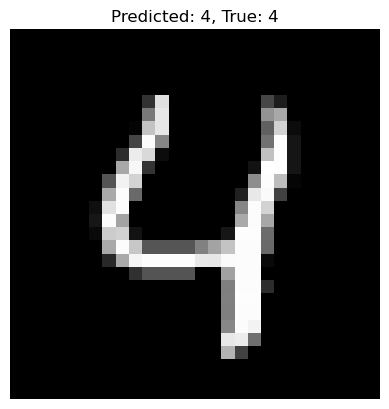


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to scale pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add a channel dimension (for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolution layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolution layer
    layers.MaxPooling2D((2, 2)),  # Second max pooling layer
    layers.Flatten(),  # Flatten the output to feed into dense layers
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(x_test)

# Function to display an image, its prediction, and the true label
def display_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, True: {np.argmax(y_test[index])}")
    plt.axis('off')
    plt.show()

# Display a few predictions
for i in range(5):
    display_prediction(i)

# Precision statistics
from sklearn.metrics import classification_report

y_test_classes = np.argmax(y_test, axis=1)
predictions_classes = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, predictions_classes))
